# Taller 7: Creación de CNN

Leonard David Vivas Dallos

## Importar Librerías

In [19]:
import tensorflow as tf
from keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import kagglehub
from PIL import Image
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

## Cargar Datos

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

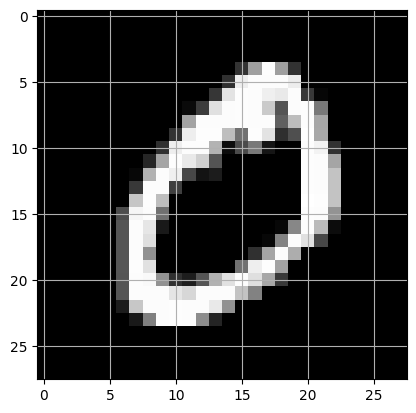

In [21]:
plt.figure()

plt.imshow(x_train[1,:,:], cmap="gray")

plt.grid("off")
plt.show()

In [22]:
# Obtener tamaño de la imagen
print(x_train.shape)

(60000, 28, 28, 1)


## Distribución de Clases

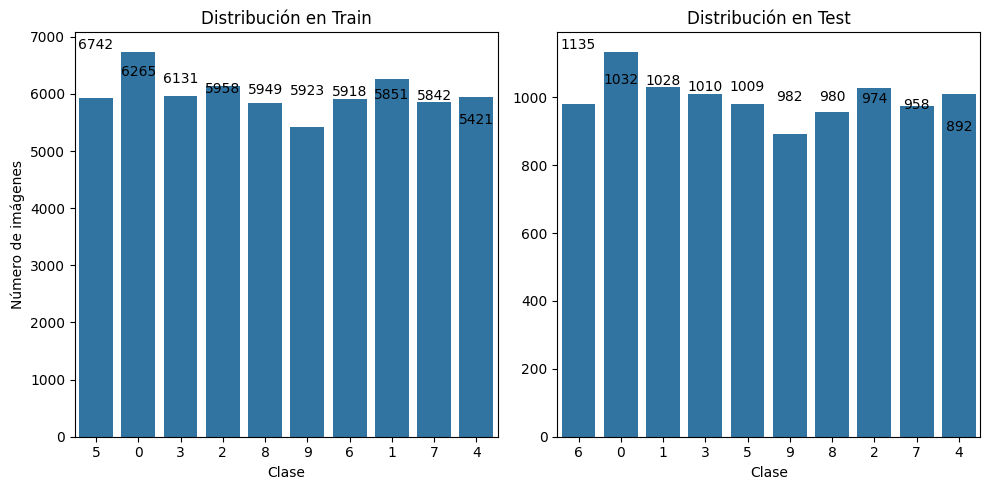

In [ ]:
plt.figure(figsize=(10, 5))

# Convertir y_train y y_test del formato codificado one-hot al formato de etiqueta
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Entrenamiento
plt.subplot(1, 2, 1)
train_dist = pd.Series(y_train_labels).value_counts()
sns.barplot(x=train_dist.index, y=train_dist.values)
plt.title('Distribución en Train')
plt.xlabel('Clase')
plt.xticks(train_dist.index, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.ylabel('Número de imágenes')
for i, v in enumerate(train_dist.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Prueba
plt.subplot(1, 2, 2)
val_dist = pd.Series(y_test_labels).value_counts()
sns.barplot(x=val_dist.index, y=val_dist.values)
plt.title('Distribución en Test')
plt.xlabel('Clase')
plt.xticks(val_dist.index, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
for i, v in enumerate(val_dist.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Arquitectura del Modelo

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


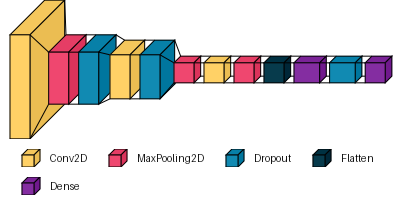

In [24]:
model = Sequential([
    # Bloques convolucionales
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Capas densas
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

visualkeras.layered_view(model, legend=True)

## Compilación del Modelo

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

## Aumento de Datos

Aumentaremos artificialmente el tamaño del conjunto de datos de imágenes aplicando algunas transformaciones aleatorias.

In [26]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Callbacks

Para nuestro modelo, vamos a hacer uso de dos callbacks. El primero de ellos, `EarlyStopping`, que se encargará de detener el entrenamiento cuando una métrica monitoreada deja de mejorar. El segundo de ellos, `ReduceLROnPlateau`, el cual reduce la tasa de aprendizaje cuando una métrica monitoreada deja de mejorar.

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

## Entrenamiento

In [29]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=48),
          epochs=25,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping, reduce_lr])

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7434 - loss: 0.1286 - val_accuracy: 0.9213 - val_loss: 0.0501 - learning_rate: 0.0010
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8096 - loss: 0.1001 - val_accuracy: 0.9491 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8379 - loss: 0.0853 - val_accuracy: 0.9493 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8558 - loss: 0.0765 - val_accuracy: 0.9472 - val_loss: 0.0292 - learning_rate: 0.0010
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8673 - loss: 0.0724 - val_accuracy: 0.9498 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8748 - loss: 0.0663 - val_accuracy: 0.9652 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accura

## Graficación del Historial de Entrenamiento

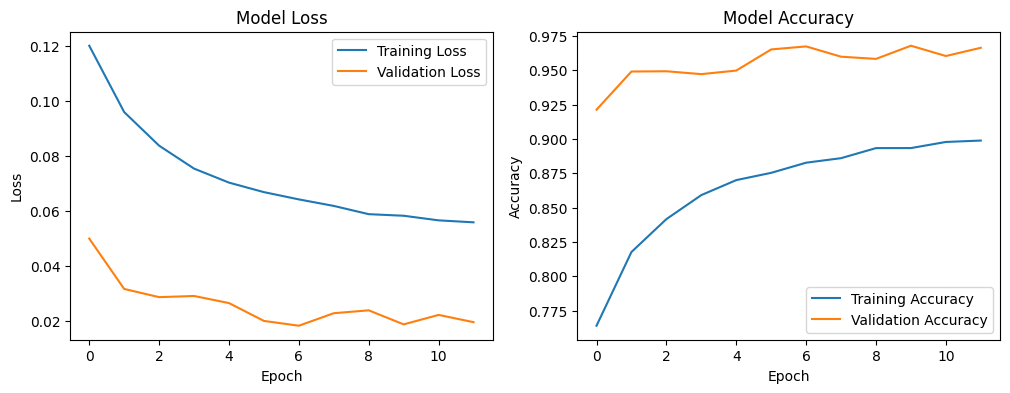

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Matriz de Confusión

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


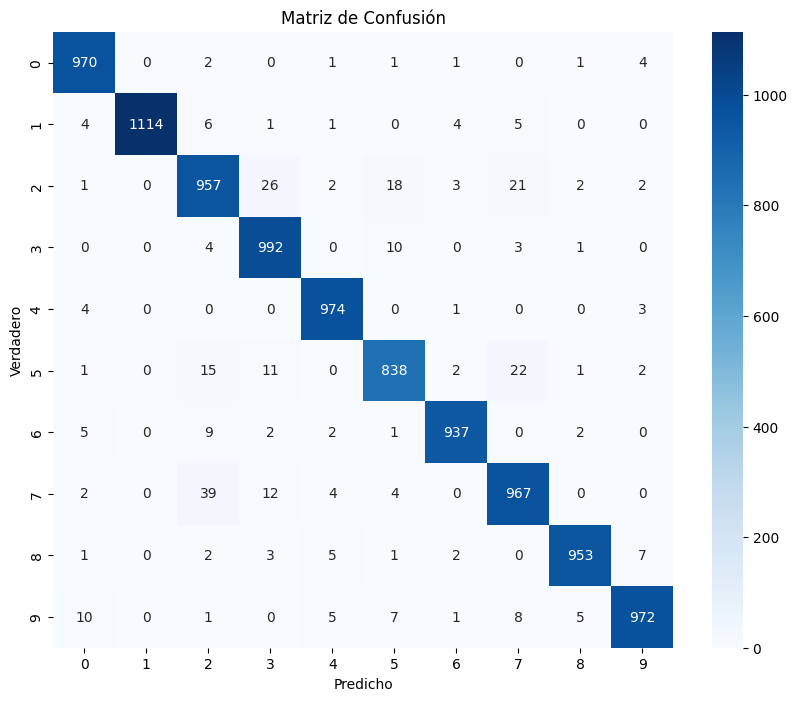

In [33]:
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

## Métricas de Rendimiento

In [ ]:
# Convertir y_test del formato codificado one-hot al formato de etiqueta
y_test_labels = np.argmax(y_test, axis=1)

print("\nReporte de Clasificación:")
print(classification_report(y_test_labels, y_pred_classes, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.92      0.93      0.93      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.99      0.99       982
           5       0.95      0.94      0.95       892
           6       0.99      0.98      0.98       958
           7       0.94      0.94      0.94      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

